<a href="https://colab.research.google.com/github/ndhend/Winc_assignments/blob/main/Final_Ass_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 3:

Which non-fossil fuel energy technology will have the best price in the future?

I decided to look at the demands of energy sourses, based on the idea that as renewable technologies become more widely adopted and production scales up, economies of scale and technological advancements could potentially lead to lower costs and prices over time.

#LR biofuel

0       1990
1       1991
2       1992
3       1993
4       1994
        ... 
1718    2018
1719    2019
1720    2020
1721    2021
1722    2022
Name: year, Length: 1723, dtype: int64

,year,biofuel_cons_per_capita,hydro_energy_per_capita,nuclear_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita
0,1965,2.706,25456.801,247.162,0.000,0.000
1,1966,2.704,25420.984,329.252,0.000,0.000
2,1967,2.700,26610.793,382.111,0.000,0.000
3,1968,2.694,26608.875,443.918,0.000,0.000
4,1969,2.686,24073.047,553.646,0.000,0.000
5,1970,6.228,24199.097,677.454,0.000,0.000
6,1971,55.079,34492.842,1273.438,0.000,0.000
7,1972,60.334,35659.961,2259.385,0.000,0.000
8,1973,55.564,37684.807,3223.277,0.000,0.000
9,1974,54.288,38495.227,3984.939,0.000,0.000


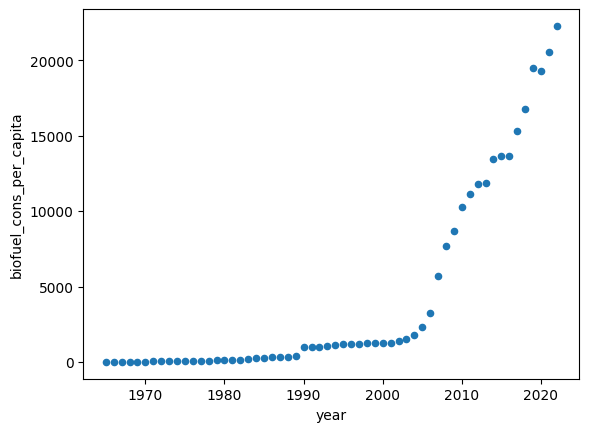

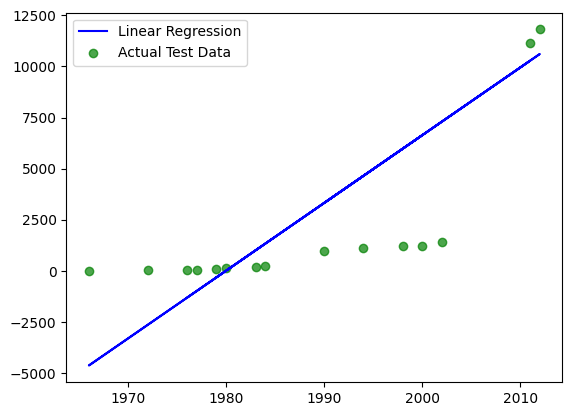

0.3386373569976582

In [ ]:
#import data
!pip install pydataset
from pydataset import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv')
# data.shape

# For this data set I only looked at certain non-fossil fuel energy sources.
non_fossil_fuel = data[[  'year',
                        'biofuel_cons_per_capita',
                        'hydro_energy_per_capita',
                        'nuclear_energy_per_capita',
                        'solar_energy_per_capita',
                        'wind_energy_per_capita'

                        ]]
# non_fossil_fuel
# display(non_fossil_fuel)
non_fossil_fuel_cleaned = non_fossil_fuel.dropna().reset_index(drop=True)
display(non_fossil_fuel_cleaned['year'])



# # convert df into a df with total renewables per year.
# # Group the data by 'year' and sum the values for each renewable energy type
non_fossil_fuel_cleaned_per_year = non_fossil_fuel_cleaned.groupby('year').sum()
non_fossil_fuel_cleaned_per_year.reset_index(inplace=True)


# Looking for missing values as I see 0.000 in my df
# renewables = non_fossil_fuel_cleaned_per_year[non_fossil_fuel_cleaned_per_year['solar_energy_per_capita'] !=  0.000 ]
renewables = non_fossil_fuel_cleaned_per_year
display(renewables)


renewables.plot(kind='scatter', x='year', y='biofuel_cons_per_capita')
plt.show()

#Test train split for supervised training
X_train, X_test_biofuel, y_train, y_test = train_test_split(
    renewables.year, renewables.biofuel_cons_per_capita)

# Create linear model and train it
LR=LinearRegression()
LR_biofuel = LR.fit(X_train.values.reshape(-1,1), y_train.values)

# Use model to predict TEST Data

biofuel_predictions = LR_biofuel.predict(X_test_biofuel.values.reshape(-1, 1))

# Plot prediction liine against actual data
plt.plot(X_test_biofuel, biofuel_predictions, label='Linear Regression', color='b')
plt.scatter(X_test_biofuel, y_test, label='Actual Test Data', color='g', alpha=.7) # alpha = brightness of the dots.
plt.legend()
plt.show()

# # Score the model
LR.score(X_test_biofuel.values.reshape(-1,1), y_test.values) # Output: 0.2138969076043844



#LR hydro_energy_per_capita

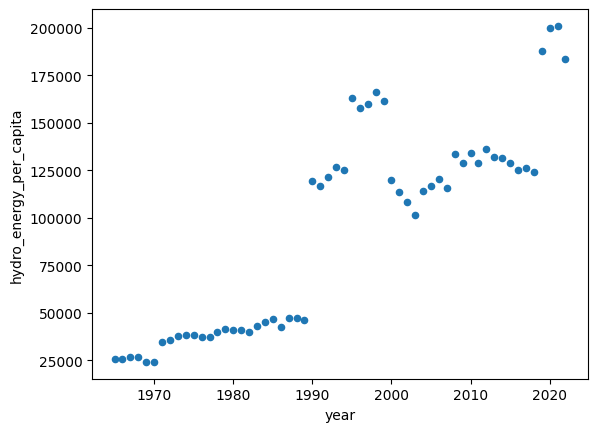

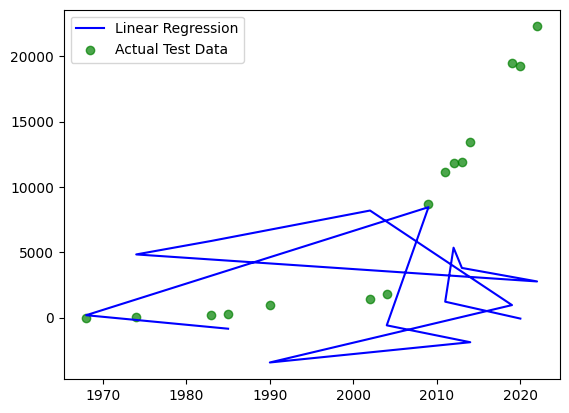

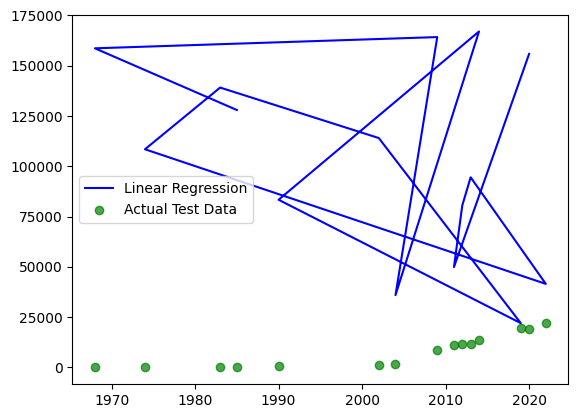

0.5652367040581637

In [ ]:
renewables.plot(kind='scatter', x='year', y='hydro_energy_per_capita')
plt.show()

#Test train split for supervised training
X_train, X_test_hydro, y_train, y_test = train_test_split(
    renewables.year, renewables.biofuel_cons_per_capita)

# Create linear model and train it
LR=LinearRegression()
LR_hydro = LR.fit(X_train.values.reshape(-1,1), y_train.values)

# Use model to predict TEST Data

biofuel_predictions = LR_hydro.predict(X_test_biofuel.values.reshape(-1, 1))

# Plot prediction liine against actual data
plt.plot(X_test_hydro, biofuel_predictions, label='Linear Regression', color='b')
plt.scatter(X_test_hydro, y_test, label='Actual Test Data', color='g', alpha=.7) # alpha = brightness of the dots.
plt.legend()
plt.show()

# # Score the model
LR.score(X_test_hydro.values.reshape(-1,1), y_test.values) # Output: 0.2138969076043844




#LR nuclear_energy_per_capita
                        

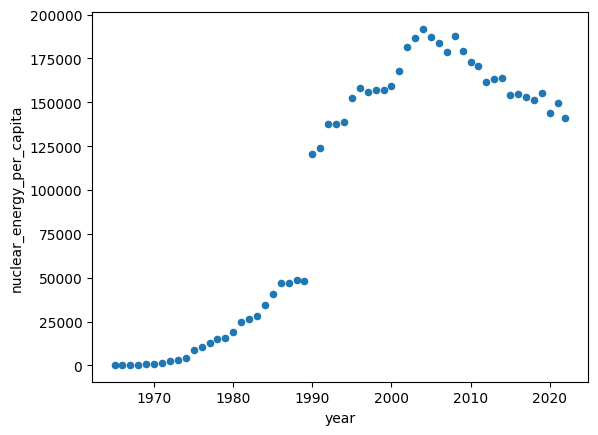

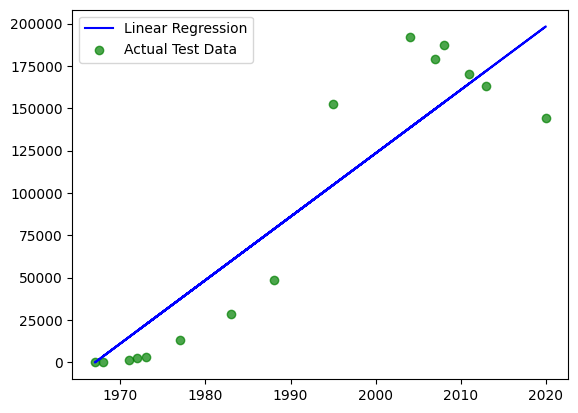

0.8604225366971061

In [ ]:

renewables.plot(kind='scatter', x='year', y='nuclear_energy_per_capita')
plt.show()

#Test train split for supervised training
X_train, X_test_nuclear, y_train, y_test = train_test_split(
    renewables.year, renewables.nuclear_energy_per_capita)

# Create linear model and train it
LR=LinearRegression()
LR_nuclear = LR.fit(X_train.values.reshape(-1,1), y_train.values)

# Use model to predict TEST Data
nuclear_predictions = LR_nuclear.predict(X_test_nuclear.values.reshape(-1, 1))

# Plot prediction liine against actual data
plt.plot(X_test_nuclear, nuclear_predictions, label='Linear Regression', color='b')
plt.scatter(X_test_nuclear, y_test, label='Actual Test Data', color='g', alpha=.7) # alpha = brightness of the dots.
plt.legend()
plt.show()

# Score the model
LR.score(X_test_nuclear.values.reshape(-1,1), y_test.values) # Output: -4.509082997412333

#LR solar_energy_per_capita
                       

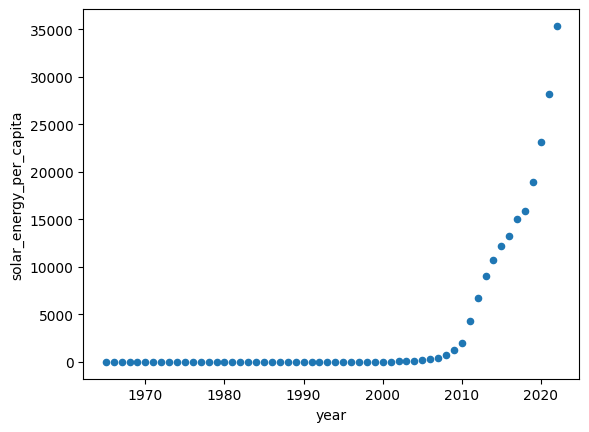

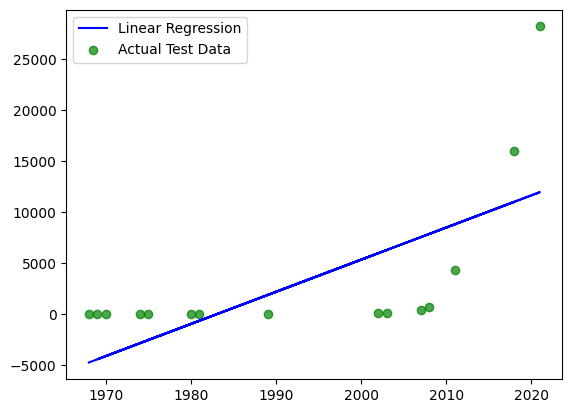

0.37718921596024846

In [ ]:

renewables.plot(kind='scatter', x='year', y='solar_energy_per_capita')
plt.show()

#Test train split for supervised training
X_train, X_test_solar, y_train, y_test = train_test_split(
    renewables.year, renewables.solar_energy_per_capita)

# Create linear model and train it
LR=LinearRegression()
LR_solar = LR.fit(X_train.values.reshape(-1,1), y_train.values)

# Use model to predict TEST Data
solar_predictions = LR_solar.predict(X_test_solar.values.reshape(-1, 1))


# Plot prediction liine against actual data
plt.plot(X_test_solar, solar_predictions, label='Linear Regression', color='b')
plt.scatter(X_test_solar, y_test, label='Actual Test Data', color='g', alpha=.7) # alpha = brightness of the dots.
plt.legend()
plt.show()

# Score the model
LR.score(X_test_solar.values.reshape(-1,1), y_test.values) # Output:0.5795128886593048

#LR  wind_energy_per_capita

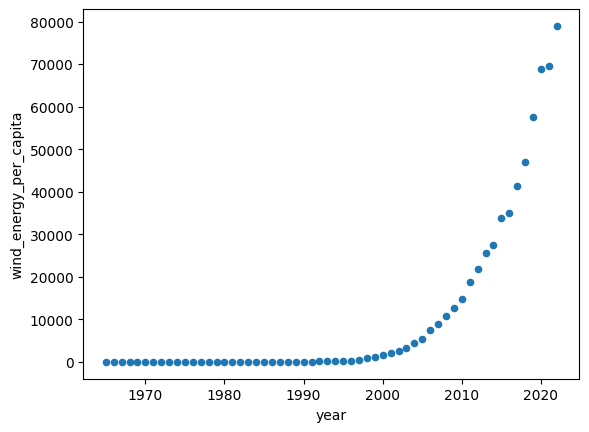

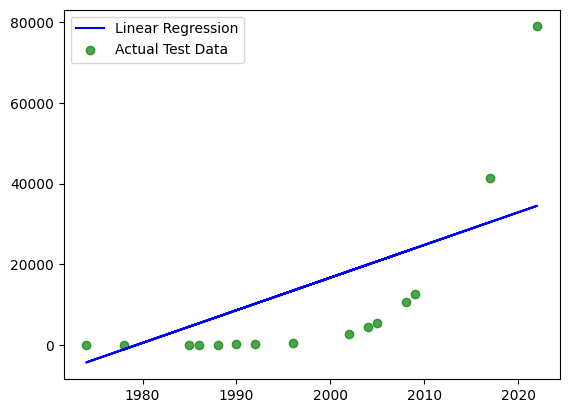

0.46363286011470295

In [ ]:

renewables.plot(kind='scatter', x='year', y='wind_energy_per_capita')
plt.show()

#Test train split for supervised training
X_train,X_test_wind, y_train, y_test = train_test_split(
    renewables.year, renewables.wind_energy_per_capita)

# Create linear model and train it
LR=LinearRegression()
LR_wind = LR.fit(X_train.values.reshape(-1,1), y_train.values)

# Use model to predict TEST Data
wind_predictions = LR_wind.predict(X_test_wind.values.reshape(-1, 1))

# Plot prediction liine against actual data
plt.plot(X_test_wind, wind_predictions, label='Linear Regression', color='b')
plt.scatter(X_test_wind, y_test, label='Actual Test Data', color='g', alpha=.7) # alpha = brightness of the dots.
plt.legend()
plt.show()

# Score the model
LR.score(X_test_wind.values.reshape(-1,1), y_test.values) # Output: 0.48817676515679853

# Test prediction for one source

In [ ]:

# Enter the year for prediction
# target_year = [2025]

# # Create a DataFrame with the target year
# target_data = pd.DataFrame({'year': [target_year]})

# # Use the trained linear regression model to make predictions
# predicted_renewable = LR.predict(target_data.values.reshape(-1, 1))

# # Print the predicted renewable energy for the target year
# print(f"Predicted renewable energy for {target_year}: {predicted_renewable[0]:.2f}")

# # Enter the years for prediction
# target_years = [2022, 2023, 2024, 2025]

# # Create a DataFrame with the target years
# target_data = pd.DataFrame({'year': target_years})

# # Use the trained linear regression model to make predictions
# predicted_renewables = LR.predict(target_data.values.reshape(-1, 1))

# # Print the predicted renewable energy for each target year
# for year, prediction in zip(target_years, predicted_renewables):
#     print(f"Predicted renewable energy for {year}: {prediction:.2f}")

#Testing on coming years

In [ ]:
# List of trained linear regression models for each renewable source
renewable_models = {
    'hydro': LR_hydro,
    'solar': LR_solar,
    'wind': LR_wind,
    # Add other models here for remaining renewable sources
}

# Enter the target years for prediction
target_years = [2022, 2023, 2024, 2025]

# Create a DataFrame with the target years
target_data = pd.DataFrame({'year': target_years})

# Predict renewable energy values for each target year using each model
predictions = {}

for source, model in renewable_models.items():
    predictions[source] = model.predict(target_data.values.reshape(-1, 1))

# Combine predictions for each target year
combined_predictions = pd.DataFrame(predictions, index=target_years)

# Print the combined predictions
print(combined_predictions)


              hydro         solar          wind
2022  172581.808096  10466.653263  29606.354418
2023  175369.676062  10718.781785  30340.009686
2024  178157.544028  10970.910307  31073.664953
2025  180945.411993  11223.038829  31807.320221


#Changing code for better visibility

In [ ]:
# List of trained linear regression models for each renewable source
renewable_models = {'biofuel':LR_biofuel,
    'hydro': LR_hydro,
    'nuclear': LR_nuclear,
    'solar': LR_solar,
    'wind': LR_wind,

}

# Enter the target years for prediction
target_years = [2024, 2025, 2026, 2027,2028, 2029,2030]

# Create a DataFrame with the target years
target_data = pd.DataFrame({'year': target_years})

# Predict renewable energy values for each target year using each model
predictions = {}

for source, model in renewable_models.items():
    predictions[source] = model.predict(target_data.values.reshape(-1, 1))

# Combine predictions for each target year
combined_predictions = pd.DataFrame(predictions, index=target_years)

# Print the combined predictions
# print(combined_predictions)

# Create a dictionary to hold the predicted values
predicted_values = {
    'biofuel': biofuel_predictions,
    'hydro': hydro_predictions,
    'nuclear': nuclear_predictions,
    'solar': solar_predictions,
    'wind': wind_predictions
}

# Convert the dictionary to a DataFrame
import pandas as pd
df_predicted = pd.DataFrame(predicted_values, index=X_test.index)

# Display the DataFrame
print(df_predicted)



# Creating a plot for better visibility

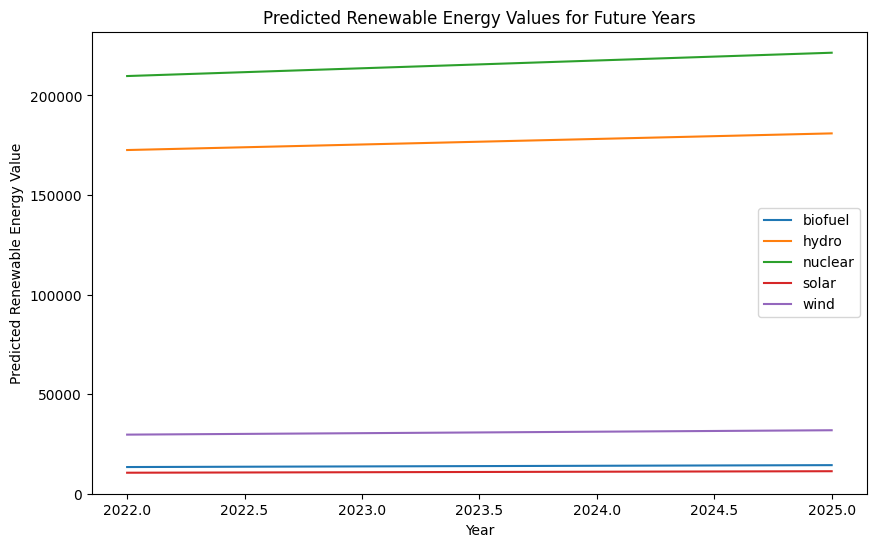

In [ ]:
# List of trained linear regression models for each renewable source
renewable_models = {
    'biofuel': LR_biofuel,
    'hydro': LR_hydro,
    'nuclear': LR_nuclear,
    'solar': LR_solar,
    'wind': LR_wind,
    # Add other models here for remaining renewable sources
}

# Enter the target years for prediction
target_years = [2022, 2023, 2024, 2025]

# Create a DataFrame with the target years
target_data = pd.DataFrame({'year': target_years})

# Predict renewable energy values for each target year using each model
predictions = {}

for source, model in renewable_models.items():
    predictions[source] = model.predict(target_data.values.reshape(-1, 1))

# Combine predictions for each target year
combined_predictions = pd.DataFrame(predictions, index=target_years)

# Plot the predicted values
plt.figure(figsize=(10, 6))
for source in renewable_models.keys():
    plt.plot(combined_predictions.index, combined_predictions[source], label=source)

plt.xlabel('Year')
plt.ylabel('Predicted Renewable Energy Value')
plt.title('Predicted Renewable Energy Values for Future Years')
plt.legend()
plt.show()


#Answer
I cannot give a clear answer as the predictability for the demand of most of the sources was around 50% or lower, except for nuclear energy, which according to the plot will have the highest demand in the future.

To answer the question: which non-fossil fuel energy technology will have the best price in the future?
I based my answer on the idea that as renewable technologies become more widely adopted and production scales up, economies of scale and technological advancements could potentially lead to lower costs and prices over time.

Based on this idea, my answer would be: nuclear energy

         biofuel          hydro        nuclear         solar          wind
52   1865.074346  155854.600302   45715.728150  10466.653263  25938.078079
56   6001.580341   49915.617606   88678.382494   3659.183178  28872.699150
8     274.110502   80582.165229   14470.161355   5171.954308  -6342.753702
43   9501.700798   94521.505057  162886.603634   2650.669091  19335.180669
10  -4498.781030   41552.013709   96489.774193   8701.753612  -4875.443166
55  11092.664642  108460.844886   37904.336451    885.769439  28139.043882
31  -1635.046111  139127.392508  127735.340989   7693.239525  10531.317456
7    9183.508029  114036.580817   41810.032301   4163.440221  -7076.408970
17   3456.038191   22036.937950   -8964.013742   8953.882133    260.143708
51  -4816.973799   83370.033194  205849.257978   3911.311699  25204.422811
40   6637.965879  167006.072165   18375.857204   7441.111003  17134.214866
2    2501.459884   35976.277778    2753.073806   -122.744648 -10744.685308
25  10456.279105  164218.